# Analysis of UQ runs
These notebooks will be used to plot data and data analysis for UQ runs for SOFE 2023.


## Run information

- baseline 2018
- pnetel is 400.
- Fixed rmajor to 9.0, the average of a previous uq run.
- Maximise Net Electric
- pheat turned on
- UQ bounds ~10%

## Import the Uncertainty Data and create object

In [1]:
%load_ext autoreload
%aimport process
%autoreload 1
import numpy as np
from pathlib import Path
from process.uncertainties.uq_analysis import UncertaintyData, Copula, InteractivePlot
# from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()

proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/data/uq_run_data/flat_dist_runs/"
figure_of_merit = "powfmw"
uq_data = UncertaintyData(proj_dir, figure_of_merit)
print("number of converged samples:",len(uq_data.converged_df))



Loading BokehJS ...

number of converged samples: 3418


## Calculate Sensitivity Indices and Reliability

In [2]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_reliability()
# print("rmajor mean: ", round(uq_data.converged_df["rmajor"].mean(),2))
print("Number of samples: ", len(uq_data.uncertainties_df))
print(
    "Number of converged runs: ",
    uq_data.number_of_converged_runs,
)
print("Reliability: ", uq_data.reliability_index)


Number of samples:  13060
Number of converged runs:  3418
Reliability:  0.26


## Regional Sensitivity - what causes PROCESS to converge?

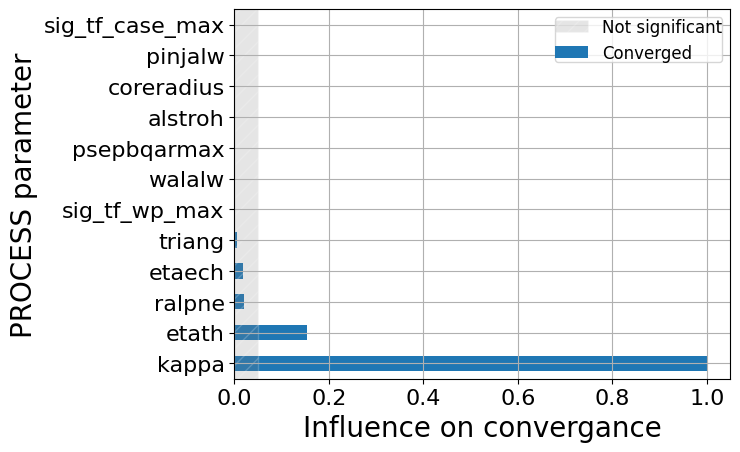

In [3]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.10).tolist()


## Find the iteration variables which are influential for the significant convergence variables

These iteration values drive performance recovery: ['betalim', 'powfmw', 'wallmw', 'bigq', 'beta', 'plhthresh', 'dene']


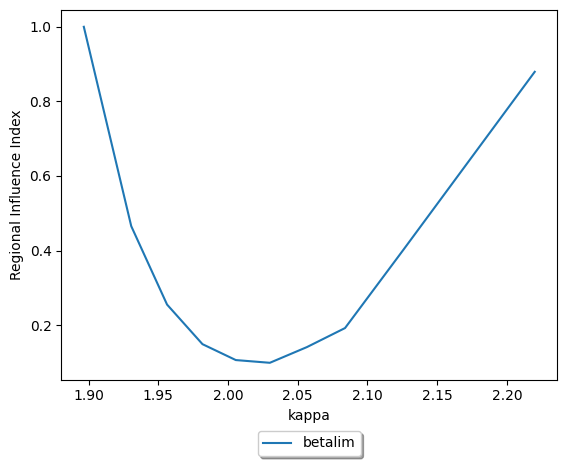

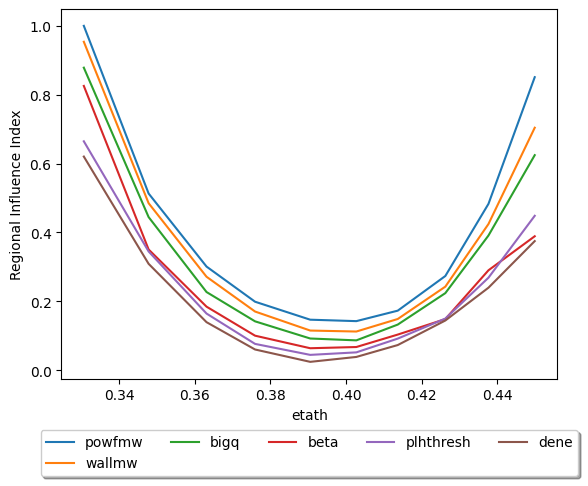

In [4]:
rsa_variables = uq_data.itv
# rsa_variables.append("kappa")
# rsa_variables = ["betalim","pdivt","powfmw"]
significant_itv_list = []
for item in significant_conv_vars:
    rsa_df = uq_data.regional_sensitivity_analysis(figure_of_merit=item,variables_to_sample=rsa_variables, dataframe=uq_data.converged_df, bins=10, confidence_level = 0.4)
    significant_itv_list.extend(rsa_df.index.tolist())
significant_itv_list = list(dict.fromkeys(significant_itv_list))
print("These iteration values drive performance recovery:", significant_itv_list)

## Create a copula based on the important variables for convergence and iteration variables

In [22]:
copula = Copula(uq_data.converged_df, significant_conv_vars)
copula.calculate_copula(input_sample_size=100,synthetic_sample_size=50000)
copula.calculate_pdf()
# copula.find_most_likely(copula.sampled_input_data,copula.synthetic_data)
copula.print_copula_data()
pdf_df=copula.create_pdf_df()
copula.find_max_pdf(print_data=False)
print("Input values:")
print(uq_data.estimate_input_values(significant_conv_vars))
# for item in significant_conv_vars:
#     copula.plot_ecdf_comparison(item)
# copula.plot_2d("kappa","cohbop")
# copula.plot_2d("etath","powfmw")
# copula.plot_2d("etath","wallmw")
# copula.plot_2d("etath","dene")
# copula.plot_pdf(["etath"])
# copula.plot_pdf(["cohbop"])

# # copula.plot_pdf(["pdivt"])
# uq_data.regional_sensitivity_analysis(figure_of_merit="etath",variables_to_sample=significant_itv_list, dataframe=copula.synthetic_data, bins=5, confidence_level = 0.2)
# uq_data.regional_sensitivity_analysis(figure_of_merit="kappa",variables_to_sample=significant_itv_list, dataframe=copula.synthetic_data, bins=5,confidence_level = 0.2)


/home/graeme/process-gh/process/env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/graeme/process-gh/process/env/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


{'correlation': [[1.0, -0.29256999611564494], [-0.29256999611564494, 1.0]], 'univariates': [{'a': -1.2138115339276434, 'b': 1.6923492981768344, 'loc': 1.9812136082016218, 'scale': 0.12490714017218207, 'type': 'copulas.univariate.truncated_gaussian.TruncatedGaussian'}, {'loc': 0.30122509060530944, 'scale': 0.1487149093946906, 'a': 1.3968865337387284, 'b': 0.9259045548549063, 'type': 'copulas.univariate.beta.BetaUnivariate'}], 'columns': ['kappa', 'etath'], 'type': 'copulas.multivariate.gaussian.GaussianMultivariate'}
Correlation matrix [[1.0, -0.29256999611564494], [-0.29256999611564494, 1.0]]
Input values:
kappa    1.866614
etath    0.374738
dtype: float64


In [23]:
itv_vars = significant_conv_vars + significant_itv_list
print(significant_itv_list)
itv_copula = Copula(uq_data.converged_df,itv_vars)
itv_copula.calculate_copula(input_sample_size=200,synthetic_sample_size=10000)
itv_copula.calculate_pdf()
# itv_copula.print_copula_data()
itv_pdf_df=itv_copula.create_pdf_df()
# itv_copula.plot_2d("kappa","betalim")
# itv_copula.plot_2d("kappa","betalim")
# itv_copula.plot_2d("kappa","vdalw")
# itv_copula.plot_2d("kappa","te")
# itv_copula.plot_2d("kappa","coheof")
# itv_copula.plot_2d("kappa","ohcth")
# print("Peak PDF values:")
itv_copula.find_max_pdf(print_data=True)

['betalim', 'powfmw', 'wallmw', 'bigq', 'beta', 'plhthresh', 'dene']


/home/graeme/process-gh/process/env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/graeme/process-gh/process/env/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


kappa        2.008382e+00
etath        4.097295e-01
betalim      6.213687e-02
powfmw       1.552495e+03
wallmw       7.656566e-01
bigq         3.205251e+01
beta         3.080673e-02
plhthresh    1.073942e+02
dene         7.029356e+19
pdf          9.484352e-01
Name: 232, dtype: float64


kappa        2.008382e+00
etath        4.097295e-01
betalim      6.213687e-02
powfmw       1.552495e+03
wallmw       7.656566e-01
bigq         3.205251e+01
beta         3.080673e-02
plhthresh    1.073942e+02
dene         7.029356e+19
pdf          9.484352e-01
Name: 232, dtype: float64

In [20]:
sens_plots=InteractivePlot(uq_data,copula)
sens_plots.create_layout(significant_conv_vars)

In [8]:
itv_plots=InteractivePlot(uq_data,itv_copula)
itv_plots.create_layout(itv_vars)

In [9]:
# sig_variables=(uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.05))
# copula = Copula(uq_data.uncertainties_df, ["kappa","etath","sqsumsq"])
# copula.calculate_copula(100)
# copula.print_copula_data()
# copula.calculate_pdf()
# copula.plot_2d("sqsumsq","kappa")
# copula.plot_pdf("kappa")
# copula.plot_ecdf_comparison("kappa")
# copula.plot_ecdf_comparison("etath")


In [10]:
# cop_data = UncertaintyData(proj_dir, figure_of_merit)
# cop_data.uncertainties_df = copula.synthetic_data
# cop_data.converged_df = cop_data.uncertainties_df[cop_data.uncertainties_df["sqsumsq"] <= -8.0]
# cop_data.calculate_reliability()
# print(cop_data.reliability_index)


## Plot ECDF and Most Reliabile Values

Compare the blue and red plots to see how similar the distributions of the sampled points which converge (blue) and don't converge (red).

Orange plots the convergence rate for a given bin of sampled points.

In [11]:
# uq_data.ecdf_plot("kappa")
# uq_data.ecdf_plot("etath")
# uq_data.ecdf_plot("triang")
# uq_data.ecdf_plot("ralpne")
# uq_data.ecdf_plot("walalw")
# uq_data.ecdf_plot("powfmw")
# uq_data.ecdf_plot("wallmw")

## Plot the Figure of Merit with Significant Input Parameters

In [12]:
# vtp=uq_data.find_significant_parameters(uq_data.sensitivity_df,"S1",0.05).values
# # #vtp=uq_data.find_influential_conv_parameters().values
# # # vtp = np.append(vtp,"walalw")
# vtp = [ "kappa", "etath"]#,"bt", "beta", "dene", "tfcth", "wallmw", "ohcth", "bigq", "bore", "betalim", "coheof", "cohbop", "gapoh", "fvsbrnni", "itvar019", "itvar020", "jwptf", "vtfskv", "vdalw", "tdmptf", "thkcas", "thwcndut", "fcutfsu", "cpttf", "gapds", "plhthresh", "tmargtf", "tmargoh", "oh_steel_frac"]
# uq_data.sampled_vars_to_plot = vtp
# uq_data.configure_data_for_plotting()
# uq_data.plot_scatter_plot(plot_unconverged=False
#                           )